In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pandas as pd

In [102]:
def get_results(rep_i, exp_alias):
    [
        losses_list,
        train_loss_list,
        test_loss_list,
        train_acc_list,
        test_acc_list,
        briers,
        num_poly,
        gini_train,
        gini_test,
        avg_stab_list,
        polytopes_per_epsilon,
        penultimate_vars,
        num_pars,
    ] = np.load('results/xor_nn_dd_'+exp_alias+'_' + str(rep_i)+ ".npy", allow_pickle=True)
    return np.asarray(polytopes_per_epsilon).reshape(-1, 5, 5), num_pars, num_poly

In [103]:
epsilons = [0.0001, 0.001, 0.01, 0.1, 1]
rep_i_list = list(range(10))
exp_aliass = ['width', 'depth']

In [104]:
exp_alias = 'width'
model_polytopes_reps, num_pars_reps, num_poly_reps = list(zip(*[get_results(rep_i, exp_alias) for rep_i in rep_i_list]))

In [106]:
np.asarray(model_polytopes_reps).shape

(10, 69, 5, 5)

(10, 5)
(10, 5)
(10, 5)
(10, 5)
(10, 5)
(10, 5)
(10, 5)
(10, 5)
(10, 5)
(10, 5)


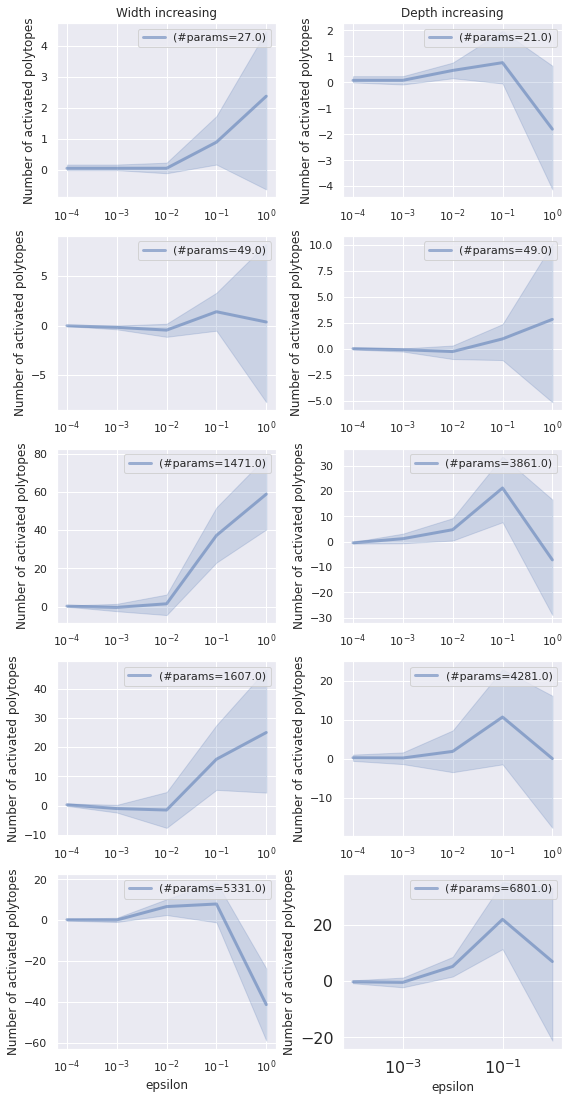

In [139]:
sns.set()
bayes_err = 0.25

##Figure params
fontsize = 16
ticksize = 16
linewidth = 2
nrows = 5
fig, axes = plt.subplots(figsize=(8, 3*nrows), nrows=nrows, ncols=2)#, sharey='row')#, sharex='col')
plt.tick_params(labelsize=ticksize)
plt.tight_layout()

for col, exp_alias in enumerate(exp_aliass):
    model_polytopes_reps, num_pars_reps, num_poly_reps = list(
        zip(*[get_results(rep_i, exp_alias) for rep_i in rep_i_list]))

    for row in range(len(axes)):
        ax = axes[row][col]
        model_index = np.linspace(0, len(num_poly)-1, nrows).astype(int)[row]
        if col == 0:
            model_index = [1, 2, 20, 21, 40, 41][row]
        else:
            model_index = [1, 2, 8, 9, 15, 16][row]
        result = np.mean(
            np.asarray(model_polytopes_reps)[:, model_index, :, :] -
            np.asarray(num_poly_reps)[:, model_index].reshape(10, 1, 1),
            axis=-1)
        print(result.shape)
        df = pd.DataFrame(
            np.asarray(result), columns=epsilons
        ).melt(
            var_name='epsilon',
            value_name='Number of activated polytopes',
        )
        sns.lineplot(
            data=df, x='epsilon', y='Number of activated polytopes',
            linewidth=3,
            label=f'(#params={np.mean(num_pars_reps, axis=0)[model_index]})',
            ax=ax, legend=True, alpha=0.5)
        if row < nrows - 1:
            ax.set_xlabel('')
        ax.set_xscale('log')
    axes[0][0].set_title('Width increasing')
    axes[0][1].set_title('Depth increasing')
plt.show()

In [ ]:
def get_results(rep_i, exp_alias):
    [
        losses_list,
        train_loss_list,
        test_loss_list,
        train_acc_list,
        test_acc_list,
        briers,
        num_poly,
        gini_train,
        gini_test,
        avg_stab_list,
        polytopes_per_epsilon,
        penultimate_vars,
        num_pars,
    ] = np.load('results/xor_nn_dd_'+exp_alias+'_' + str(rep_i)+ ".npy", allow_pickle=True)
    return np.asarray(polytopes_per_epsilon).reshape(-1, 5, 5), num_pars, num_poly

(10, 69)
(10, 69)
(10, 69)
(10, 69)
(10, 69)
(10, 19)
(10, 19)
(10, 19)
(10, 19)
(10, 19)


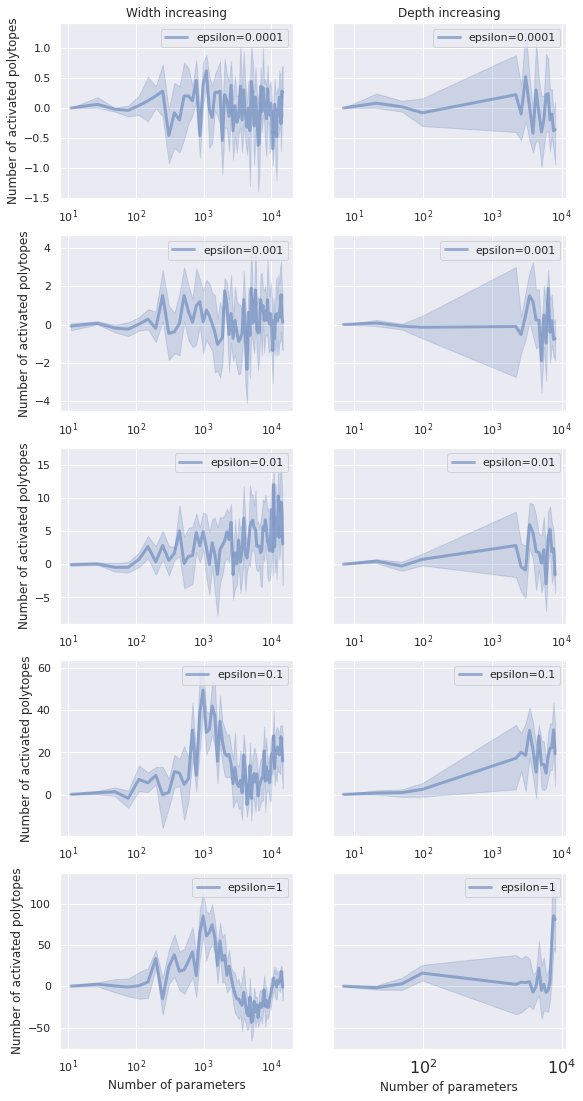

In [117]:
sns.set()

##Figure params
fontsize = 16
ticksize = 16
linewidth = 2
nrows = len(epsilons)
fig, axes = plt.subplots(figsize=(8, 3*nrows), nrows=nrows, ncols=2, sharey='row')#, sharex='col')
plt.tick_params(labelsize=ticksize)
plt.tight_layout()

for col, exp_alias in enumerate(exp_aliass):
    model_polytopes_reps, num_pars_reps, num_poly_reps = list(
        zip(*[get_results(rep_i, exp_alias) for rep_i in rep_i_list]))

    for row in range(len(axes)):
        ax = axes[row][col]
        result = np.mean(
            np.asarray(model_polytopes_reps)[:, :, row, :] -
            np.asarray(num_poly_reps).reshape(10, -1, 1),
            axis=-1)
        # print(result.shape)
        # print(result)
        df = pd.DataFrame(
            result, columns=np.mean(num_pars_reps, axis=0)
        ).melt(
            var_name='Number of parameters',
            value_name='Number of activated polytopes',
        )
        sns.lineplot(
            data=df, x='Number of parameters', y='Number of activated polytopes',
            linewidth=3,
            label=f'epsilon={epsilons[row]}',
            ax=ax, legend=True, alpha=0.5)
        if row < nrows - 1:
            ax.set_xlabel('')
        ax.set_xscale('log')
        # if col == 0:
            # ax.set_ylabel(f'# Activated regions (epsilon={epsilons[row]})')
    axes[0][0].set_title('Width increasing')
    axes[0][1].set_title('Depth increasing')
plt.show()